In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
cd "C:\Users\saads\Downloads\pyt\Country_data_analysis-master"

C:\Users\saads\Downloads\pyt\Country_data_analysis-master


In [78]:
dat= pd.read_csv("Country-data.csv")

In [79]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [80]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [81]:
dat.shape

(167, 10)

In [82]:
dat.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [83]:
dat["exports"]= dat["exports"]*dat["gdpp"]/100
dat["imports"]= dat["imports"]*dat["gdpp"]/100
dat["health"]= dat["health"]*dat["gdpp"]/100

In [84]:
dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler= StandardScaler()

In [87]:
datm= dat.drop("country",axis=1)

In [88]:
dat2= scaler.fit_transform(datm)

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca= PCA(svd_solver="randomized",random_state= 42)

In [91]:
pca.fit(dat2)

PCA(random_state=42, svd_solver='randomized')

In [92]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [93]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

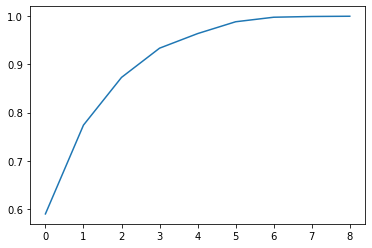

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [95]:
from sklearn.decomposition import IncrementalPCA

In [96]:
pca_final= PCA(n_components=3)

In [97]:
df_train_pca= pca_final.fit_transform(dat2)

In [98]:
df_train_pca.shape

(167, 3)

In [99]:
pc=np.transpose(df_train_pca)

In [100]:
rownames= list(dat["country"])

In [101]:
pcs_df2= pd.DataFrame({"country":rownames, "PC1":pc[0], "PC2":pc[1], "PC3":pc[2]})

In [102]:
pcs_df2.shape

(167, 4)

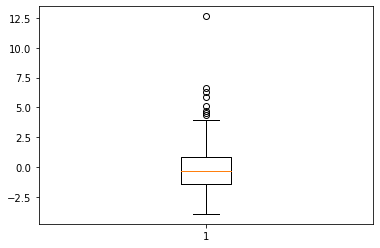

In [103]:
plt.boxplot(pcs_df2.PC1)
Q1= pcs_df2.PC1.quantile(0.05)
Q3= pcs_df2.PC1.quantile(0.95)
IQR=Q3-Q1
pcs_df2= pcs_df2[(pcs_df2.PC1>=Q1)&(pcs_df2.PC1<=Q3)]

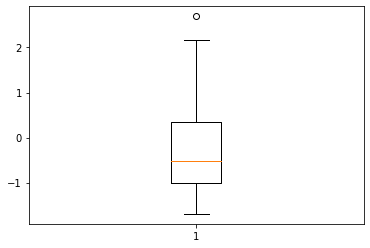

In [104]:
plt.boxplot(pcs_df2.PC2)
Q1= pcs_df2.PC2.quantile(0.05)
Q3= pcs_df2.PC2.quantile(0.95)
IQR=Q3-Q1
pcs_df2= pcs_df2[(pcs_df2.PC2>=Q1)&(pcs_df2.PC2<=Q3)]

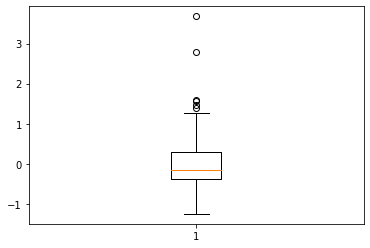

In [105]:
plt.boxplot(pcs_df2.PC3)
Q1= pcs_df2.PC3.quantile(0.05)
Q3= pcs_df2.PC3.quantile(0.95)
IQR=Q3-Q1
pcs_df2= pcs_df2[(pcs_df2.PC3>=Q1)&(pcs_df2.PC3<=Q3)]

In [106]:
pcs_df2.shape

(119, 4)

In [107]:
dat3= pcs_df2
dat3_1= scaler.fit_transform(dat3.drop("country",axis=1))

In [108]:
from sklearn.metrics import silhouette_score

In [109]:
from sklearn.cluster import KMeans

In [110]:
sse= []
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(dat3_1)
    sse.append([k,silhouette_score(dat3_1,kmeans.labels_)])

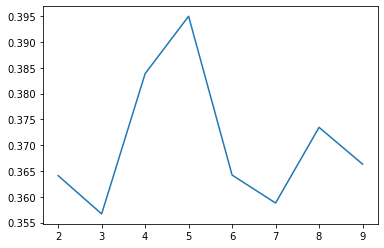

In [111]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1]);

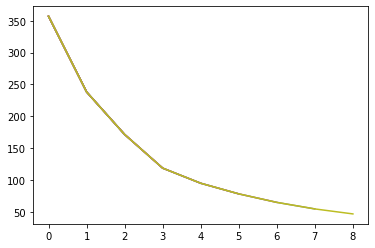

In [112]:
ssd=[]
for num_clusters in list(range(1,10)):
    model_clus= KMeans(n_clusters= num_clusters,max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)
    plt.plot(ssd)

In [113]:
model_clus5= KMeans(n_clusters=5,max_iter=50)

In [114]:
model_clus5.fit(dat3_1)

KMeans(max_iter=50, n_clusters=5)

In [115]:
dat4=dat3

In [116]:
dat4.index= pd.RangeIndex(len(dat4.index))

In [117]:
dat4

,country,PC1,PC2,PC3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Algeria,-0.459557,-0.675495,0.959355
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430
3,Armenia,-0.334555,-1.271889,0.190564
4,Australia,3.181525,-0.262485,-0.130870
...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829
115,Uzbekistan,-1.031922,-0.561378,0.763442
116,Vanuatu,-1.175210,-0.275652,-0.667131
117,Vietnam,-0.594449,-1.076335,0.528875


In [118]:
dat_km= pd.concat([dat4,pd.Series(model_clus5.labels_)],axis=1)

In [119]:
dat_km.columns= ["country","PC1","PC2","PC3","ClusterID"]

In [120]:
dat_km["ClusterID"].value_counts()

0    44
2    28
1    21
4    19
3     7
Name: ClusterID, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

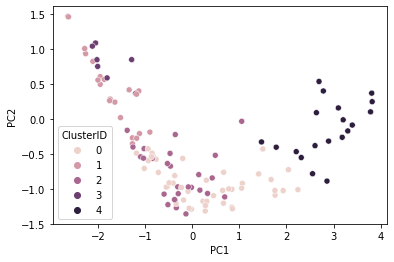

In [121]:
sns.scatterplot(x="PC1",y="PC2",hue="ClusterID",data= dat_km)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

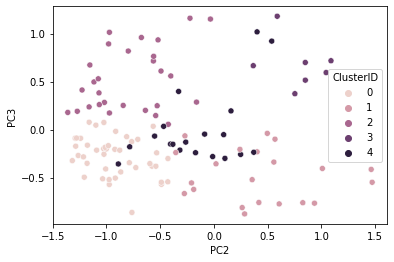

In [122]:
sns.scatterplot(x="PC2",y="PC3",hue= "ClusterID",data= dat_km)

<AxesSubplot:xlabel='PC3', ylabel='PC1'>

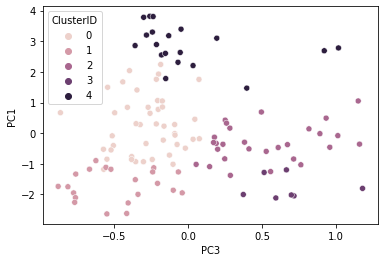

In [123]:
sns.scatterplot(x="PC3",y="PC1",hue= "ClusterID",data= dat_km)

In [124]:
dat_km

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.635575,1.472267,-0.549489,1
1,Algeria,-0.459557,-0.675495,0.959355,2
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,0
3,Armenia,-0.334555,-1.271889,0.190564,2
4,Australia,3.181525,-0.262485,-0.130870,4
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,0
115,Uzbekistan,-1.031922,-0.561378,0.763442,2
116,Vanuatu,-1.175210,-0.275652,-0.667131,1
117,Vietnam,-0.594449,-1.076335,0.528875,2


In [125]:
dat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [126]:
dat5= pd.merge(dat,dat_km,on="country")
dat5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,1
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,2
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.334555,-1.271889,0.190564,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.181525,-0.262485,-0.130870,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,0.454814,-1.098889,0.045829,0
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,-1.031922,-0.561378,0.763442,2
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175210,-0.275652,-0.667131,1
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.594449,-1.076335,0.528875,2


In [127]:
dat6= dat5.drop(["PC1","PC2","PC3"],axis=1)

In [128]:
dat6[dat6["ClusterID"]==0]["country"].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belize', 'Bhutan', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Colombia', 'Croatia', 'Czech Republic', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Fiji', 'Greece', 'Grenada', 'Guatemala',
       'Guyana', 'Hungary', 'Latvia', 'Lithuania', 'Maldives',
       'Mauritius', 'Morocco', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Samoa',
       'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Spain', 'St. Vincent and the Grenadines', 'Suriname', 'Tonga',
       'Tunisia', 'Uruguay'], dtype=object)

In [129]:
dat6[dat6["ClusterID"]==1]["country"].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'India',
       'Kenya', 'Lao', 'Liberia', 'Madagascar', 'Micronesia, Fed. Sts.',
       'Myanmar', 'Namibia', 'Pakistan', 'Rwanda', 'Solomon Islands',
       'South Africa', 'Tanzania', 'Turkmenistan', 'Uganda', 'Vanuatu'],
      dtype=object)

In [130]:
dat6[dat6["ClusterID"]==2]["country"].unique()

array(['Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Bolivia', 'Brazil',
       'Chile', 'China', 'Ecuador', 'Egypt', 'Georgia', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Libya', 'Malaysia', 'Moldova', 'Nepal', 'Oman', 'Russia',
       'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan', 'Vietnam'],
      dtype=object)

In [131]:
dat6[dat6["ClusterID"]==3]["country"].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Mauritania', 'Sudan',
       'Yemen'], dtype=object)

In [132]:
dat6[dat6["ClusterID"]==4]["country"].unique()

array(['Australia', 'Austria', 'Bahrain', 'Canada', 'Cyprus', 'Finland',
       'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Malta', 'New Zealand', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [133]:
from scipy.cluster.hierarchy import linkage

In [134]:
from scipy.cluster.hierarchy import dendrogram

In [135]:
from scipy.cluster.hierarchy import cut_tree

In [136]:
mergings= linkage(dat3_1,method="single",metric="euclidean")

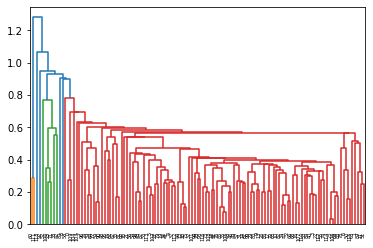

In [137]:
dendrogram(mergings)
plt.show()

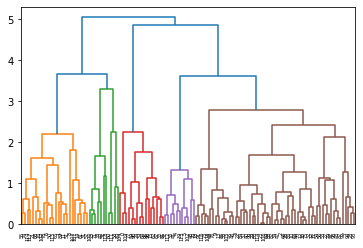

In [138]:
mergings= linkage(dat3_1,method="complete",metric="euclidean")
dendrogram(mergings)
plt.show()

In [139]:
clustercut= pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))

In [140]:
dat3_hc= pd.concat([dat3,clustercut],axis=1)

In [141]:
dat3_hc.columns= ["country","PC1","PC2","PC3","ClusterID"]

In [142]:
dat7= pd.merge(dat,dat3_hc,on="country")

In [143]:
dat8= dat7.drop(["PC1","PC2","PC3"],axis=1)
dat8

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3
...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,2
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,1
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,2
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1


In [144]:
dat8["ClusterID"].value_counts()

2    57
1    24
0    16
4    11
3    11
Name: ClusterID, dtype: int64

In [145]:
dat8[dat8["ClusterID"]==0]["country"].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Namibia', 'Pakistan', 'Rwanda',
       'Solomon Islands', 'South Africa', 'Tanzania', 'Uganda'],
      dtype=object)

In [146]:
dat8[dat8["ClusterID"]==1]["country"].unique()

array(['Algeria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Bolivia', 'Brazil',
       'Chile', 'Egypt', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kyrgyz Republic', 'Libya', 'Malaysia', 'Moldova', 'Nepal',
       'Russia', 'Suriname', 'Tajikistan', 'Turkey', 'Ukraine',
       'Uzbekistan', 'Vietnam'], dtype=object)

In [147]:
dat8[dat8["ClusterID"]==2]["country"].unique()

array(['Antigua and Barbuda', 'Armenia', 'Bahamas', 'Bangladesh',
       'Barbados', 'Belize', 'Bhutan', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Greece', 'Grenada', 'Guatemala',
       'Guyana', 'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Morocco', 'Myanmar', 'New Zealand', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Samoa',
       'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Spain', 'St. Vincent and the Grenadines', 'Tonga', 'Tunisia',
       'Turkmenistan', 'Uruguay', 'Vanuatu'], dtype=object)

In [148]:
dat8[dat8["ClusterID"]==3]["country"].unique()

array(['Australia', 'Austria', 'Canada', 'Finland', 'France', 'Germany',
       'Iceland', 'Malta', 'Sweden', 'United Kingdom', 'United States'],
      dtype=object)

In [149]:
dat8[dat8["ClusterID"]==4]["country"].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Mauritania', 'Oman', 'Sudan', 'United Arab Emirates', 'Yemen'],
      dtype=object)